## 安装环境

In [2]:
import torch
torch.__version__
torch.cuda.is_available()

True

## 简单回归问题


### 梯度下降算法

dl就是靠梯度下降算法撑起来的

基础原理：**x = x =>  x = x-f'(x)*lr => x = x-f'(x)*lr**   （f(x)就是loss的函数)

**关于这一部分，这个“减”我理解的是偏导数反映的是loss的变化趋势，如果为正，即x加大会导致loss加大，那么x需要减去一个值去趋近于真实值；**

**如果为负，即x加大loss减少，那么为使x更靠近真实值，就需要x加大，即减去负的值（偏导数为负）。**

**总的来说就是与偏导数（反映loss的变化趋势）相反的方向进行**

**见后面使用梯度下降的方法求解w和b**

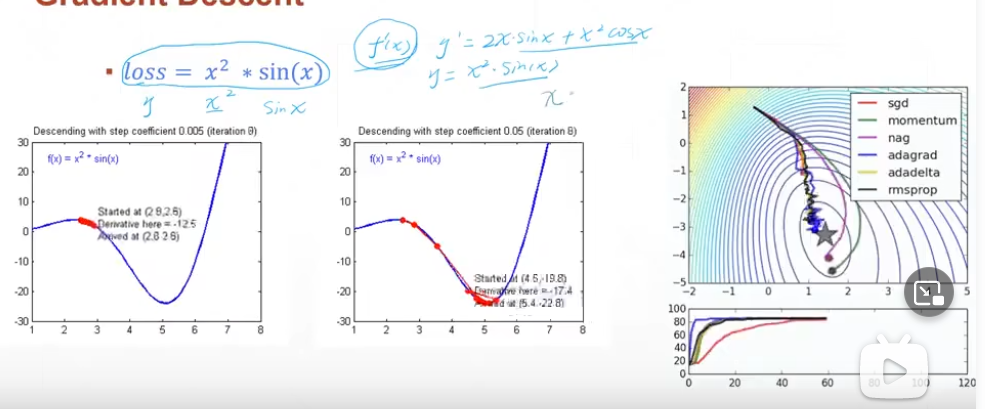
到loss最低的一个点（导数为0）就快结束了，但是并不会不变，而是会在那个点来回徘徊，上下波动。
lr（学习率）会影响找到最优解。

为了使得梯度下降的速率提高，精度提高等，不同的求解器提出。本质上就是他们为梯度下降的过程加各种各样的约束（相较于基础原理）。

常用求解器：**sgd（最原始的） rmsprops adam**



求解：

有精确解：closed form solution

存在大量噪声，希望求得近似解

y=wx+b 希望求得 (wx+b - y)最小值，使得y约等于wx+b。
因此构造loss=(WX+b-y)^2。

线性优化
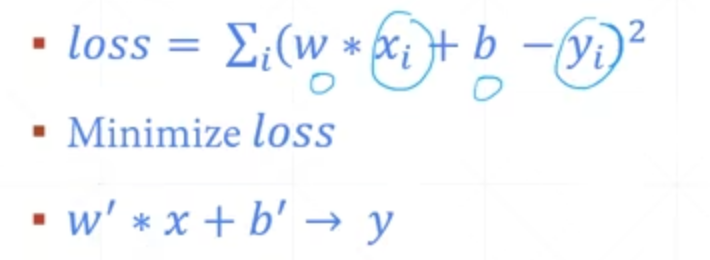

linear regression  : 预测值处在连续空间 y范围可以取到无穷
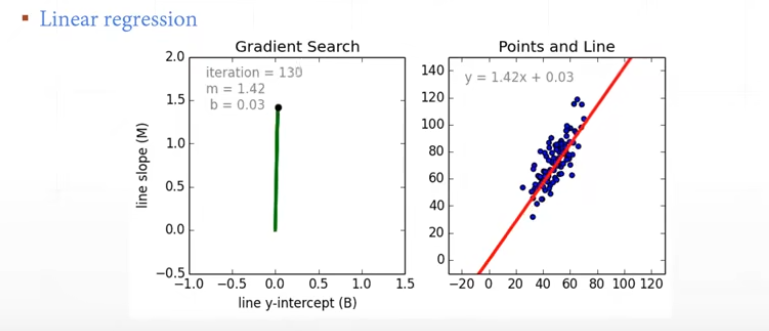

logistic regression ： 预测值处在0，1 的连续空间，范围被压缩   二分类问题

classification：多分类问题


注：关于这三种回归，up主讲的不太清楚


### 代码进行实践

$loss = (wx+b -y)^2$

$\frac{loss}{n}=\frac{\sum (wx+b -y)^2}{n}$

In [1]:
import numpy as np
def compute_error_for_line_given_points(b,w,points):
    totalError = 0
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError+=(y-(w*x+b))**2
    return totalError /float(len(points)) ##返回的是平均的loss

公式：

$w^{\prime} = w - lr \times\frac{\nabla loss}{\nabla w}$

$b^{\prime} = b - lr \times\frac{\nabla loss}{\nabla b}$



In [2]:
def step_gradient(b_current,w_current,points,learningRate):
    ##通过梯度下降，将b和w变成新的b'和w'
        b_gradient = 0
        w_gradient = 0
        N = float(len(points))
        for i in range(0,len(points)):
            x = points[i,0]
            y = points[i,1]
            b_gradient += (2/N) *((w_current*x)+b_current-y)##直接加上偏导数  累加后除以N做平均
#             b_gradient = b_gradient/N
            w_gradient += (2/N )*x*((w_current*x)+b_current-y)
#             w_gradient = w_gradient/N
    ###对应公式
        new_b = b_current - (learningRate*b_gradient) ##经过梯度下降之后的新值
        new_w = w_current - (learningRate*w_gradient)
        return [new_b,new_w]
         

In [3]:
def gradient_descent_runner(points,starting_b,starting_w,learningRate,num_iterations):
    ##迭代一定次数
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b,w = step_gradient(b,w,np.array(points),learningRate)
    return [b,w]


In [4]:
def run():
    ##读取多组（x,y）
    points = np.genfromtxt("data.csv",delimiter=",")
    ##初始值
    learningRate = 0.001
    inital_b = 0
    inital_w = 0
    num_iterations = 10000 ##迭代10000次的结果比1000次的接近的多得多
    print("staring gradient descent at b={0},w={1},error={2}".format(inital_b,inital_w,compute_error_for_line_given_points(inital_b,inital_w,points)))
    print("running.....")
    ##进行迭代梯度下降，获取最后的结果
    [b,w] = gradient_descent_runner(points,inital_b,inital_w,learningRate,num_iterations)
    print("after{0} iterations,b={1},w={2},error={3}".format(num_iterations,b,w,compute_error_for_line_given_points(b,w,points)))


In [5]:
if __name__ =='__main__':
    run()
##将该输出结果与后面的对比
##10000次  lr=0.001 结果
##staring gradient descent at b=0,w=0,error=601.8568518490139
# running.....
# after10000 iterations,b=3.0450910326848244,w=2.054363255779095,error=6.894945280986599

staring gradient descent at b=0,w=0,error=601.8568518490139
running.....
after10000 iterations,b=3.0450910326848244,w=2.054363255779095,error=6.894945280986599


### 验证
生成用于验证的点50组，存到csv文件

符合公式$y=2*x+3+\epsilon$

In [18]:
import numpy as np
def data():
    x = np.linspace(-20,20,50)
    y = 2*x + 3 + np.random.randn(len(x))*3   
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    c = np.concatenate([x,y],axis=1)
    return c
np.savetxt('data.csv',data(),delimiter=",")